In [24]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Helper Functions

In [2]:
def clean_tweets(df):
    temp_df = df.copy()
    
    #This code removes all links, mentions, numbers and rows mentioning FUNKO POPS
    temp_df.drop_duplicates(['SentimentText'], keep='first')
    temp_df = temp_df[temp_df.SentimentText.str.contains("Funko") == False]
    temp_df = temp_df[temp_df.SentimentText.str.contains("funko") == False]
    temp_df = temp_df[temp_df.SentimentText.str.contains("For a chance to #WIN") == False]
    temp_df = temp_df[temp_df.SentimentText.str.contains("For a chance to WIN") == False]
    temp_df = temp_df[temp_df.SentimentText.str.contains("for a chance to win") == False]
    temp_df = temp_df[temp_df.SentimentText.str.contains("for a chance to WIN") == False]
    temp_df = temp_df[temp_df.SentimentText.str.contains("for your chance to win") == False]
    temp_df = temp_df[temp_df.SentimentText.str.contains("For your chance to WIN") == False]
    temp_df.SentimentText = [re.sub(r"https?:\/\/.*\/[a-zA-Z0-9]*", "", w) for w in temp_df.SentimentText]
    temp_df.SentimentText = [re.sub(r"https?:\/\/.*\/[a-zA-Z0-9]*", "", w) for w in temp_df.SentimentText]
    temp_df.SentimentText = [re.sub(r"&amp;quot;|&amp;amp'", "", w) for w in temp_df.SentimentText]
    temp_df.SentimentText = [re.sub(r"@[a-zA-Z0-9]*", "", w) for w in temp_df.SentimentText]
    temp_df.SentimentText = [re.sub(r"\$[a-zA-Z0-9]*", "", w) for w in temp_df.SentimentText]
    temp_df.SentimentText = [re.sub(r"[0-9]*", "", w) for w in temp_df.SentimentText]
    temp_df.SentimentText = [w.strip() for w in temp_df.SentimentText]
    
    temp_df.SentimentText = temp_df.SentimentText.str.replace('[^\w\s]','')
        
    return temp_df

# Analysis

## Creating DF and Cleaning Tweets

In [3]:
# skips problem lines for now
df = pd.read_csv("Sentiment Analysis Dataset.csv",error_bad_lines=False, encoding='utf-8')

b'Skipping line 8836: expected 4 fields, saw 5\n'
b'Skipping line 535882: expected 4 fields, saw 7\n'


In [4]:
clean_df = clean_tweets(df)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(clean_df.SentimentText, clean_df.Sentiment, test_size=0.20, random_state=42)

In [6]:
vectorizer_train = CountVectorizer()
X_train = vectorizer_train.fit_transform(X_train)

In [7]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train)
X_train_tf = tf_transformer.transform(X_train)

In [8]:
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_)
X_test = vectorizer_test.transform(X_test)

## Multinomial Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
clf = MultinomialNB()
fit = clf.fit(X_train_tf,y_train)
y_pred = clf.predict(X_test)

### Metrics

In [29]:
print(confusion_matrix(y_test,y_pred))

[[128251  29167]
 [ 39588 118713]]


In [30]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.76      0.81      0.79    157418
          1       0.80      0.75      0.78    158301

avg / total       0.78      0.78      0.78    315719



In [31]:
y_score = fit.predict_proba(X_test)

In [32]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

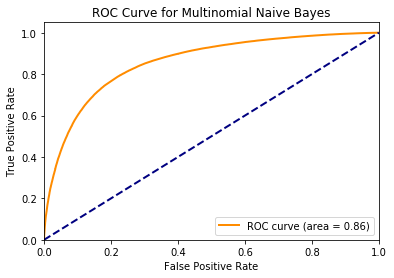

In [34]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multinomial Naive Bayes')
plt.legend(loc="lower right")
plt.show()

## Bernoulli Naive Bayes

In [14]:
from sklearn.naive_bayes import BernoulliNB

In [19]:
clf = BernoulliNB()
fit = clf.fit(X_train_tf,y_train)
y_pred = clf.predict(X_test)

### Metrics

In [18]:
print(confusion_matrix(y_test,y_pred))

[[121929  35489]
 [ 34545 123756]]


In [14]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.78      0.78      0.78    157670
          1       0.78      0.78      0.78    158053

avg / total       0.78      0.78      0.78    315723



In [20]:
y_score = fit.predict_proba(X_test)

In [22]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

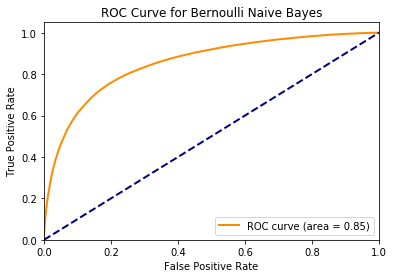

In [26]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bernoulli Naive Bayes')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

In [35]:
clf = LogisticRegression()
fit = clf.fit(X_train_tf,y_train)
y_pred = clf.predict(X_test)

### Metrics

In [37]:
print(confusion_matrix(y_test,y_pred))

[[137062  20356]
 [ 46404 111897]]


In [38]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.75      0.87      0.80    157418
          1       0.85      0.71      0.77    158301

avg / total       0.80      0.79      0.79    315719



In [39]:
y_score = fit.predict_proba(X_test)

In [40]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

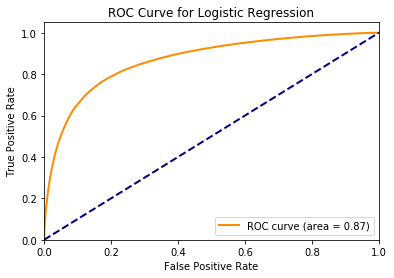

In [41]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## Exploratory Data Analysis

In [10]:
tdf = pd.read_csv("tweetList.csv",error_bad_lines=False, encoding='utf-8')
print("Tweet list length before cleaning: " + str(len(tdf.index)))
cleaned_tweets = clean_tweets(tdf)
print("Tweet list after cleaning: " + str(len(cleaned_tweets.index)))
apr10df = cleaned_tweets[cleaned_tweets.date.str.contains("Apr 10") == True]
apr9df = cleaned_tweets[cleaned_tweets.date.str.contains("Apr 09") == True]
apr8df = cleaned_tweets[cleaned_tweets.date.str.contains("Apr 08") == True]
apr7df = cleaned_tweets[cleaned_tweets.date.str.contains("Apr 07") == True]
apr6df = cleaned_tweets[cleaned_tweets.date.str.contains("Apr 06") == True]
apr5df = cleaned_tweets[cleaned_tweets.date.str.contains("Apr 05") == True]
apr4df = cleaned_tweets[cleaned_tweets.date.str.contains("Apr 04") == True]
apr3df = cleaned_tweets[cleaned_tweets.date.str.contains("Apr 03") == True]
apr2df = cleaned_tweets[cleaned_tweets.date.str.contains("Apr 02") == True]
apr1df = cleaned_tweets[cleaned_tweets.date.str.contains("Apr 01") == True]
mar31df = cleaned_tweets[cleaned_tweets.date.str.contains("Mar 31") == True]
print(len(apr10df.index))

Tweet list length before cleaning: 79902
Tweet list after cleaning: 46649
1556
